In [106]:

import os
import sys
import ot 
import torch 

# Set wd
print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np

nbr_bins = 6

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/hodgkin_huxley/sbc


In [107]:
# set style
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [108]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))


def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")

In [109]:
from scipy.stats import binom
from scipy.stats import chi2

#chi2


In [140]:
ej = 1/nbr_bins*100

In [141]:
ej

16.666666666666664

In [115]:
lower = binom.ppf(0.005, 100, 1/nbr_bins)
upper = binom.ppf(0.995, 100, 1/nbr_bins)

In [116]:
lower

8.0

In [117]:
upper

27.0

# SNL

In [177]:
snl_ranks = np.zeros((96,10))

counter = 0 
for i in range(100):
    
    if i != 18 and i != 78 and i != 88  and i != 95:
        snl_ranks[counter,:] = read_posterior_samples("ranks_snl_snl_10_200_"+str(i+1)+".csv")
        counter = counter +1
        

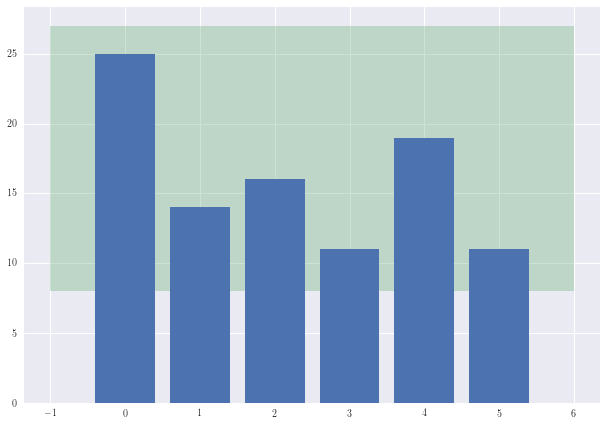

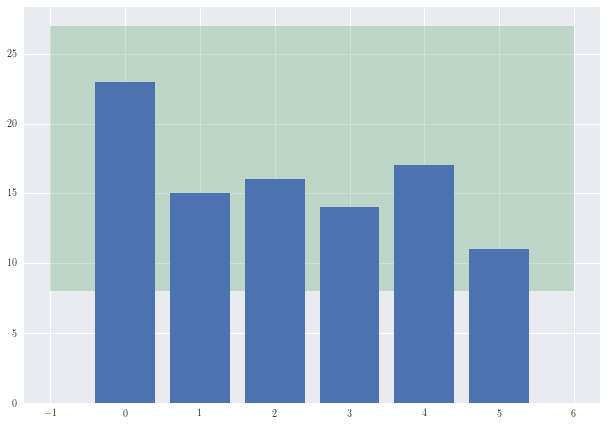

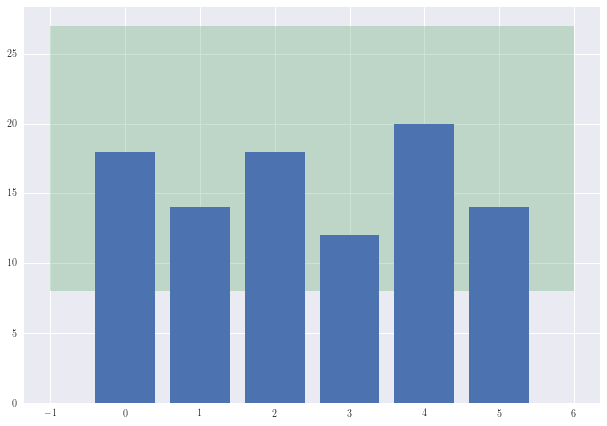

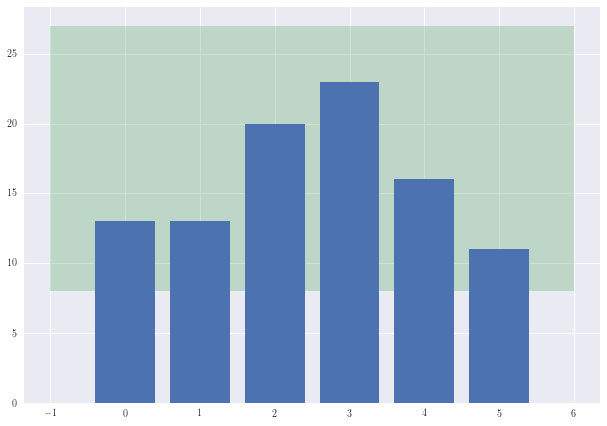

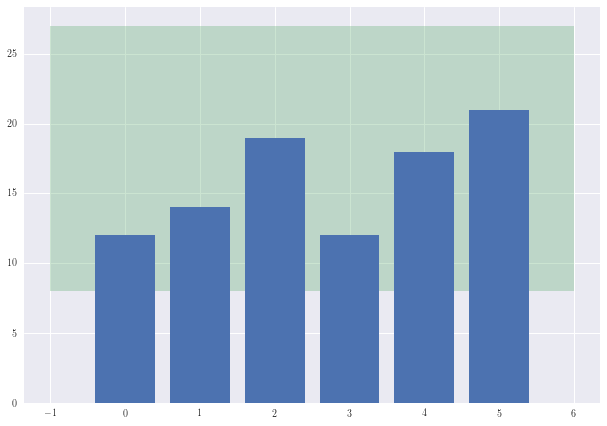

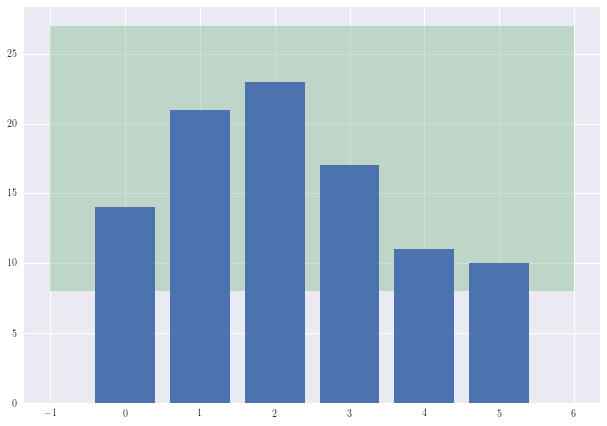

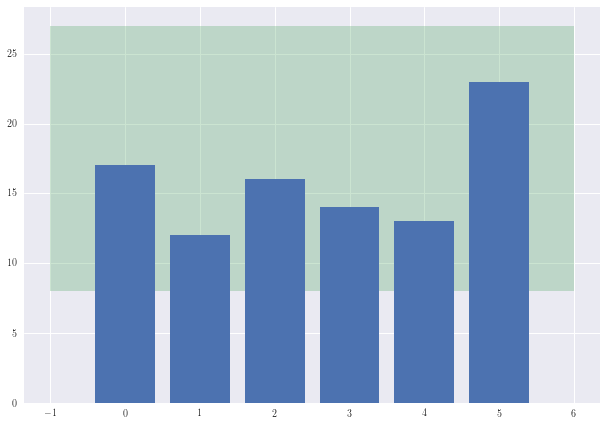

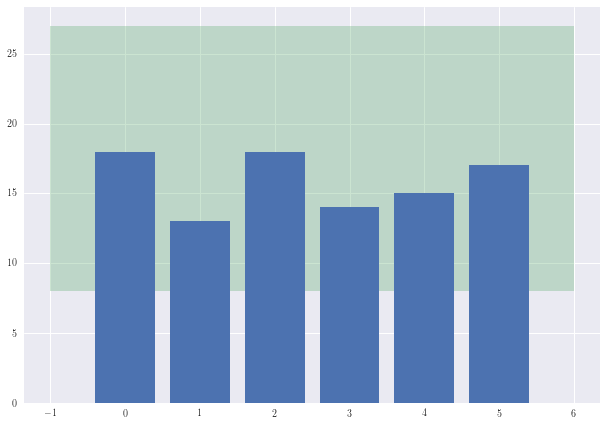

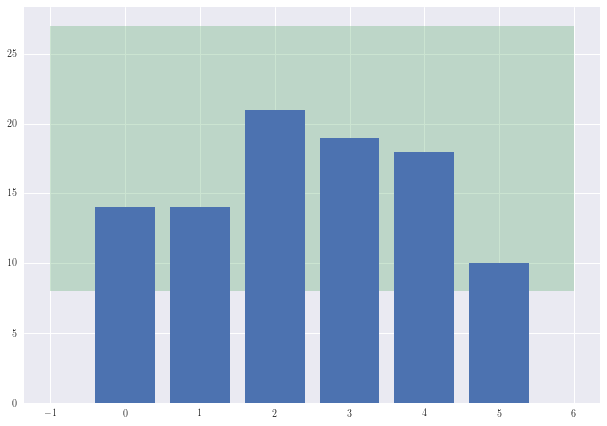

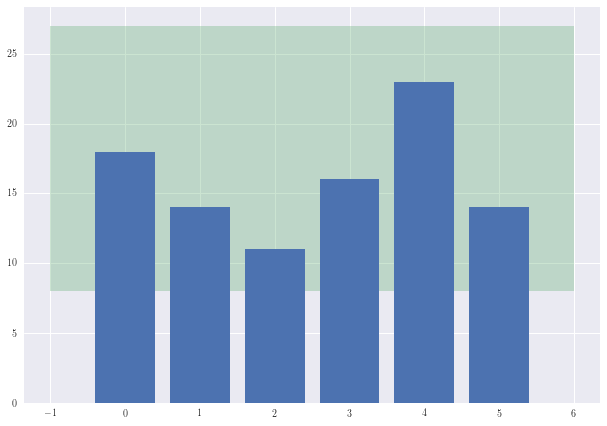

In [178]:
theta_ranks = [snl_ranks[:,0], 
               snl_ranks[:,1], 
               snl_ranks[:,2], 
               snl_ranks[:,3],
               snl_ranks[:,4],
               snl_ranks[:,5],
               snl_ranks[:,6],
               snl_ranks[:,7],
               snl_ranks[:,8],
               snl_ranks[:,9]]

for t in theta_ranks:

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(t == i)
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.arange(nbr_bins), nbr_in_bin[0,:])
    ax.fill_between(np.arange(-1, nbr_bins+1, 1),lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), alpha = 0.3)

In [179]:
theta_ranks = [snl_ranks[:,0], 
               snl_ranks[:,1], 
               snl_ranks[:,2], 
               snl_ranks[:,3],
               snl_ranks[:,4],
               snl_ranks[:,5],
               snl_ranks[:,6],
               snl_ranks[:,7],
               snl_ranks[:,8],
               snl_ranks[:,9]]

p_vals = np.zeros((1,len(theta_ranks)))

for t in range(len(theta_ranks)):

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(theta_ranks[t] == i)
        
    x2 = sum(sum((nbr_in_bin - ej)**2 / ej))
    
    p_vals[0,t] = chi2.cdf(x2, nbr_bins-1)

print(p_vals)
print(p_vals.mean())

[[0.88268764 0.57921865 0.30618111 0.75118028 0.53338373 0.87204542
  0.5816741  0.10117977 0.59380483 0.62191272]]
0.5823268246076143


# SNPE-C

In [180]:
#snpe_c_ranks = read_posterior_samples("ranks_snpec_snl_10_200_1.csv")

snpe_c_ranks = np.zeros((99,10))

counter = 0 
for i in range(100):
    
    if i != 56: # and i != 18 and i != 31 and i != 63 and i != 78 and i != 88  and i != 95:
        snpe_c_ranks[counter,:] = read_posterior_samples("ranks_snpec_snl_10_200_"+str(i+1)+".csv")
        counter = counter +1
        

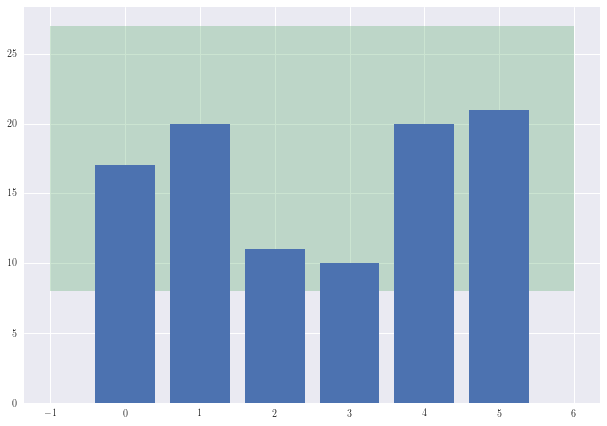

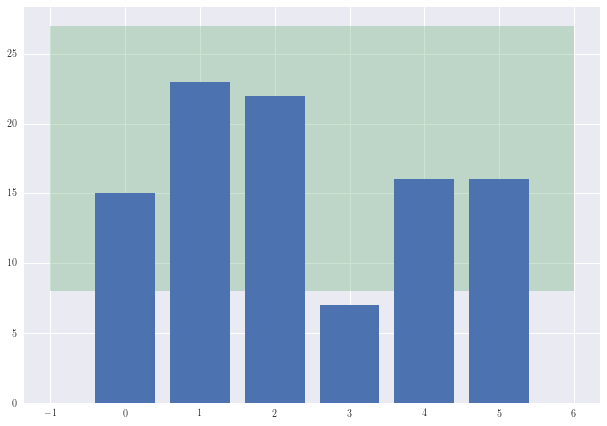

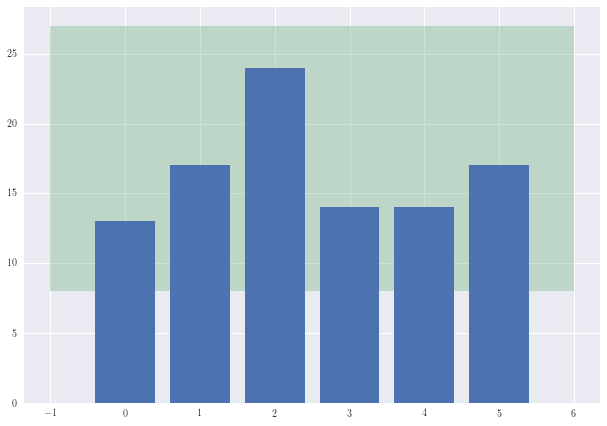

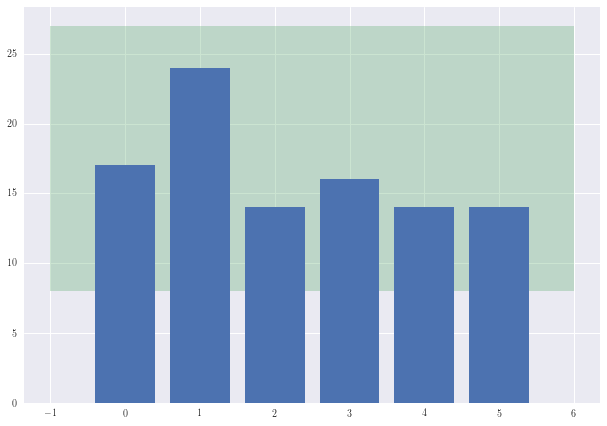

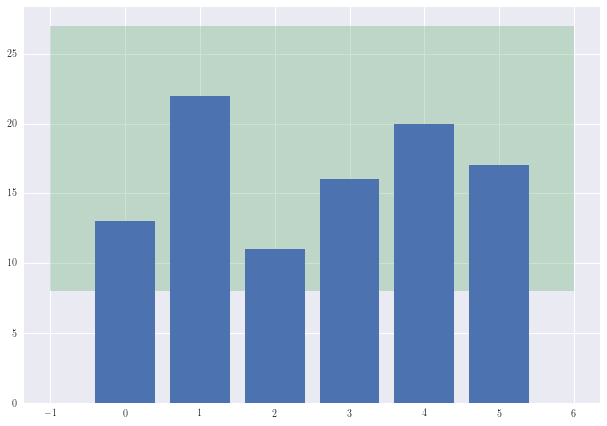

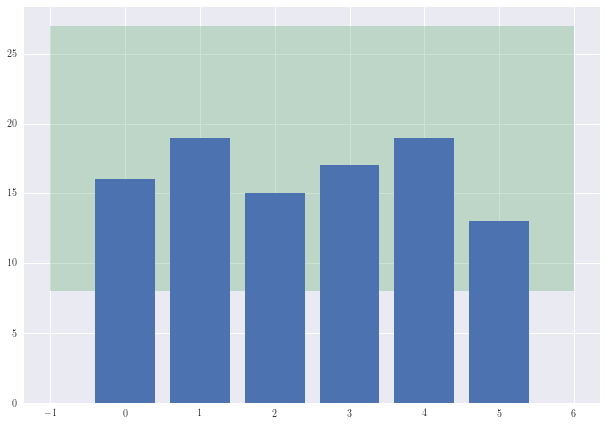

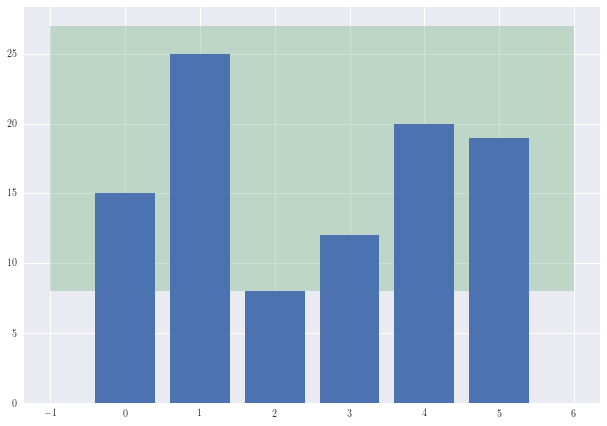

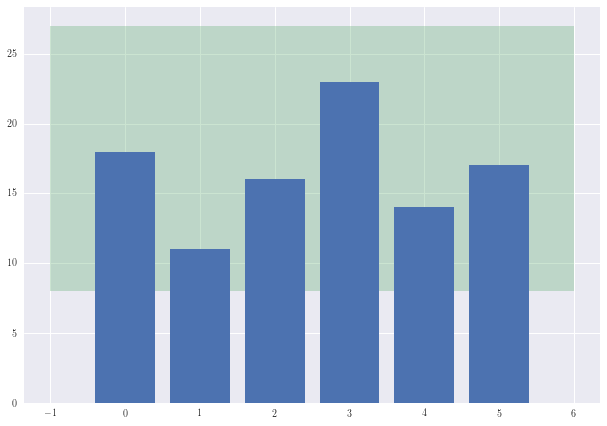

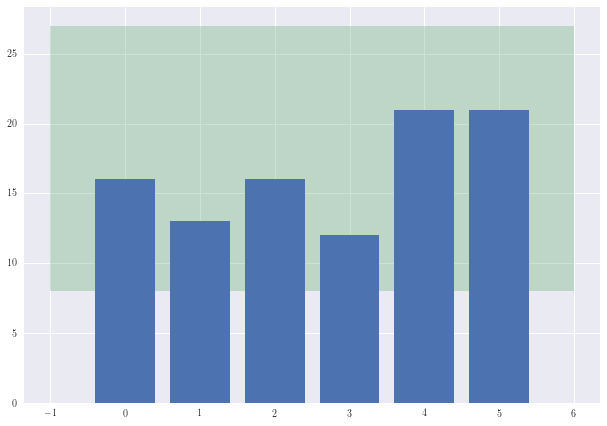

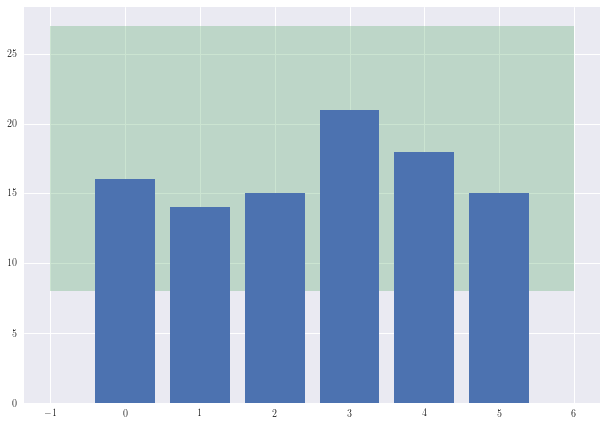

In [181]:

theta_ranks = [snpe_c_ranks[:,0], 
               snpe_c_ranks[:,1], 
               snpe_c_ranks[:,2], 
               snpe_c_ranks[:,3],
               snpe_c_ranks[:,4],
               snpe_c_ranks[:,5],
               snpe_c_ranks[:,6],
               snpe_c_ranks[:,7],
               snpe_c_ranks[:,8],
               snpe_c_ranks[:,9]]

for t in theta_ranks:

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(t == i)
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.arange(nbr_bins), nbr_in_bin[0,:])
    ax.fill_between(np.arange(-1, nbr_bins+1, 1),lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), alpha = 0.3)

In [182]:
theta_ranks = [snpe_c_ranks[:,0], 
               snpe_c_ranks[:,1], 
               snpe_c_ranks[:,2], 
               snpe_c_ranks[:,3],
               snpe_c_ranks[:,4],
               snpe_c_ranks[:,5],
               snpe_c_ranks[:,6],
               snpe_c_ranks[:,7],
               snpe_c_ranks[:,8],
               snpe_c_ranks[:,9]]

p_vals = np.zeros((1,len(theta_ranks)))

for t in range(len(theta_ranks)):

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(theta_ranks[t] == i)
        
    x2 = sum(sum((nbr_in_bin - ej)**2 / ej))
    
    p_vals[0,t] = chi2.cdf(x2, nbr_bins-1)
    
print(p_vals)
print(p_vals.mean())

[[0.78378386 0.92304672 0.57179405 0.52545052 0.60096541 0.10609996
  0.95132622 0.57179405 0.50934202 0.15362921]]
0.5697232023643143


# SNPLA

In [188]:
#snpla_ranks = read_posterior_samples("ranks_snpla_snl_10_200_1.csv")

snpla_ranks = np.zeros((100,10))

counter = 0 
for i in range(100):
    
    #if i != 56: # and i != 18 and i != 31 and i != 63 and i != 78 and i != 88  and i != 95:
    snpla_ranks[counter,:] = read_posterior_samples("ranks_snpla_snl_10_200_"+str(i+1)+".csv")
    counter = counter +1

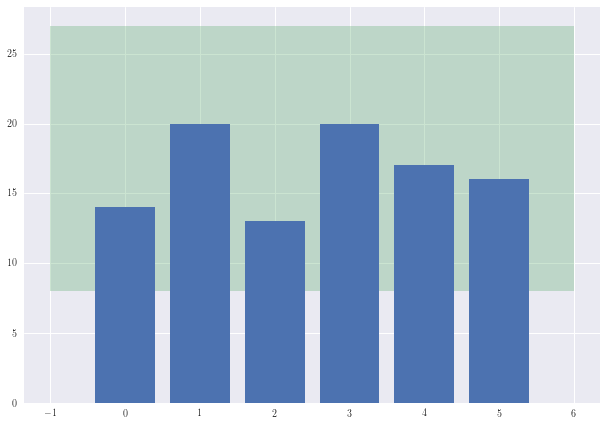

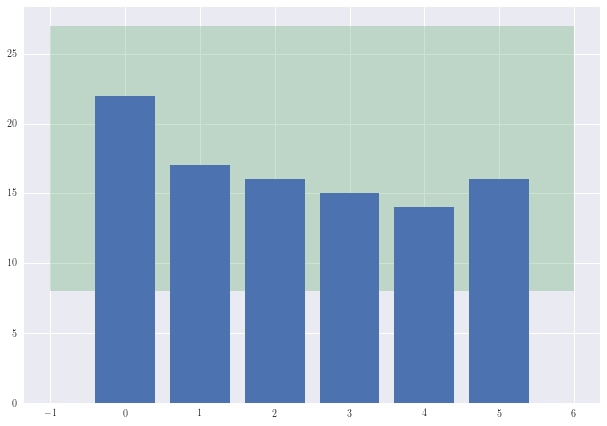

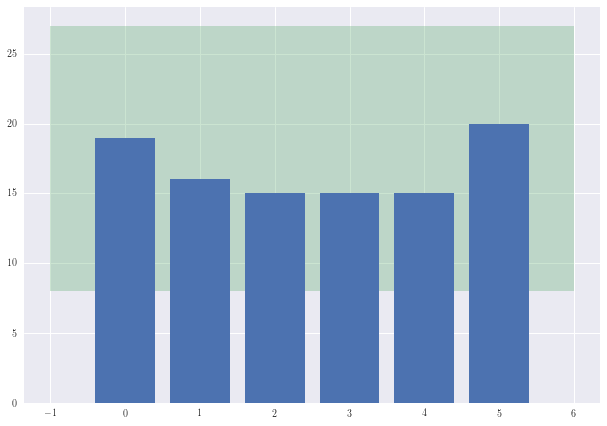

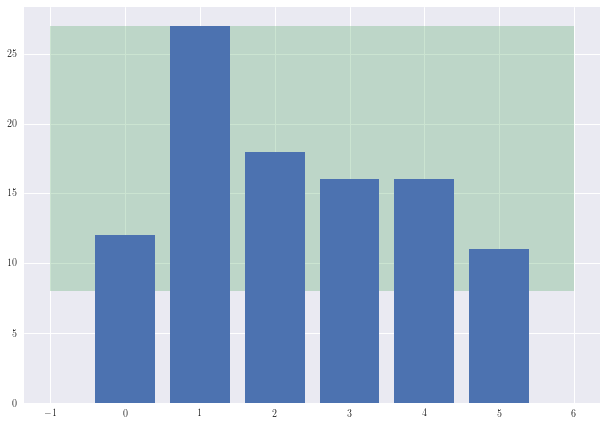

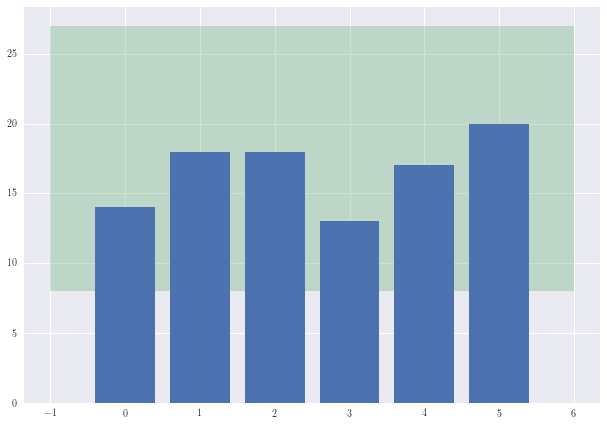

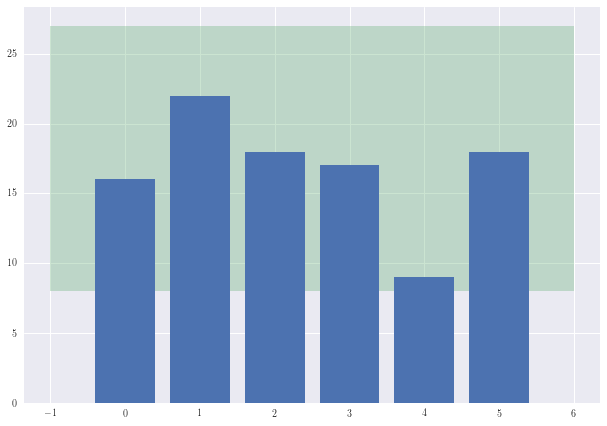

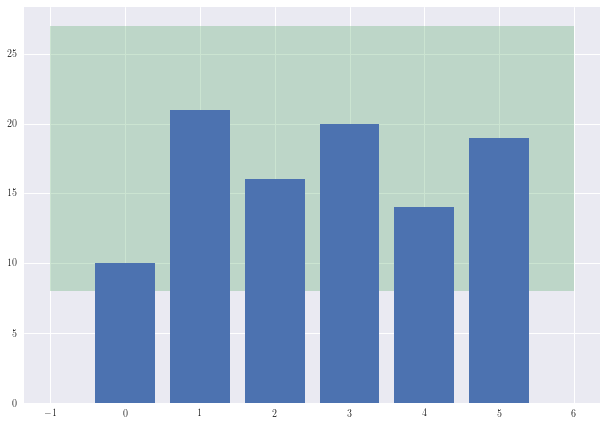

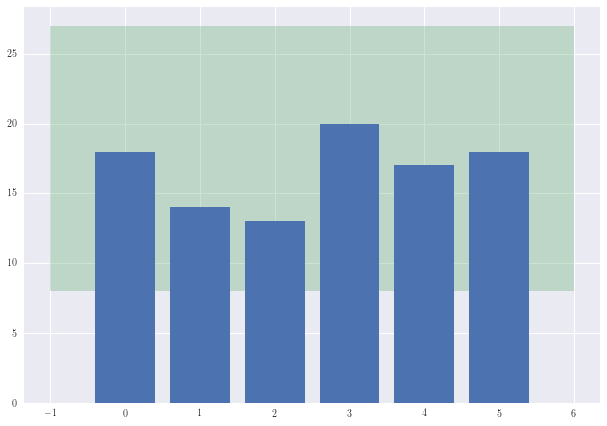

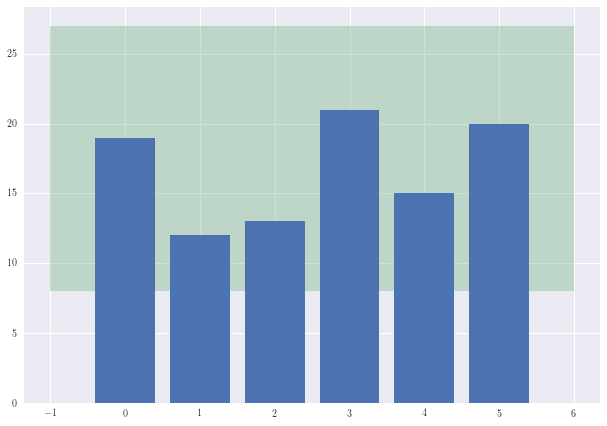

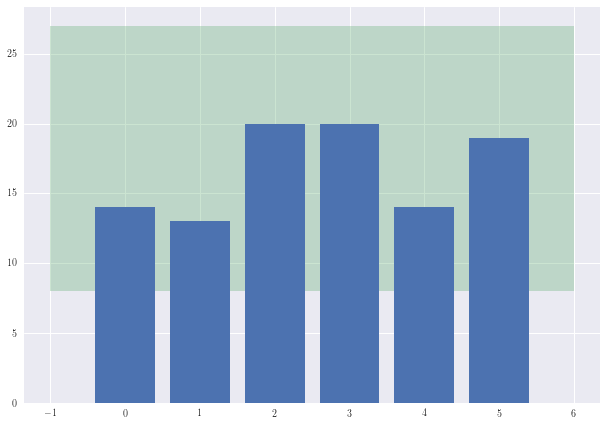

In [189]:
theta_ranks = [snpla_ranks[:,0], 
               snpla_ranks[:,1], 
               snpla_ranks[:,2], 
               snpla_ranks[:,3],
               snpla_ranks[:,4],
               snpla_ranks[:,5],
               snpla_ranks[:,6],
               snpla_ranks[:,7],
               snpla_ranks[:,8],
               snpla_ranks[:,9]]

for t in theta_ranks:

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(t == i)
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.arange(nbr_bins), nbr_in_bin[0,:])
    ax.fill_between(np.arange(-1, nbr_bins+1, 1),lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), alpha = 0.3)

In [190]:
theta_ranks = [snpla_ranks[:,0], 
               snpla_ranks[:,1], 
               snpla_ranks[:,2], 
               snpla_ranks[:,3],
               snpla_ranks[:,4],
               snpla_ranks[:,5],
               snpla_ranks[:,6],
               snpla_ranks[:,7],
               snpla_ranks[:,8],
               snpla_ranks[:,9]]

p_vals = np.zeros((1,len(theta_ranks)))

for t in range(len(theta_ranks)):

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(theta_ranks[t] == i)
        
    x2 = sum(sum((nbr_in_bin - ej)**2 / ej))
    
    p_vals[0,t] = chi2.cdf(x2, nbr_bins-1)
    
print(p_vals)
print(p_vals.mean())

[[0.23863473 0.20258437 0.08924966 0.91889539 0.16769601 0.63985606
  0.61270204 0.16769601 0.50662648 0.34921889]]
0.38931596428283893


In [191]:
labels = [r"$\log(\bar{g}_{Na})$",
              r"$\log(\bar{g}_K)$",
              r"$\log(g_{leak})$",
              r"$\log(E_{Na})$",
              r"$\log(-E_K)$",
              r"$\log(-E_{leak})$",
              r"$\log(\bar{g}_M)$",
              r"$\log(\tau_{max})$",
              r"$\log(Vt)$",
             r"$\log(\sigma)$"]

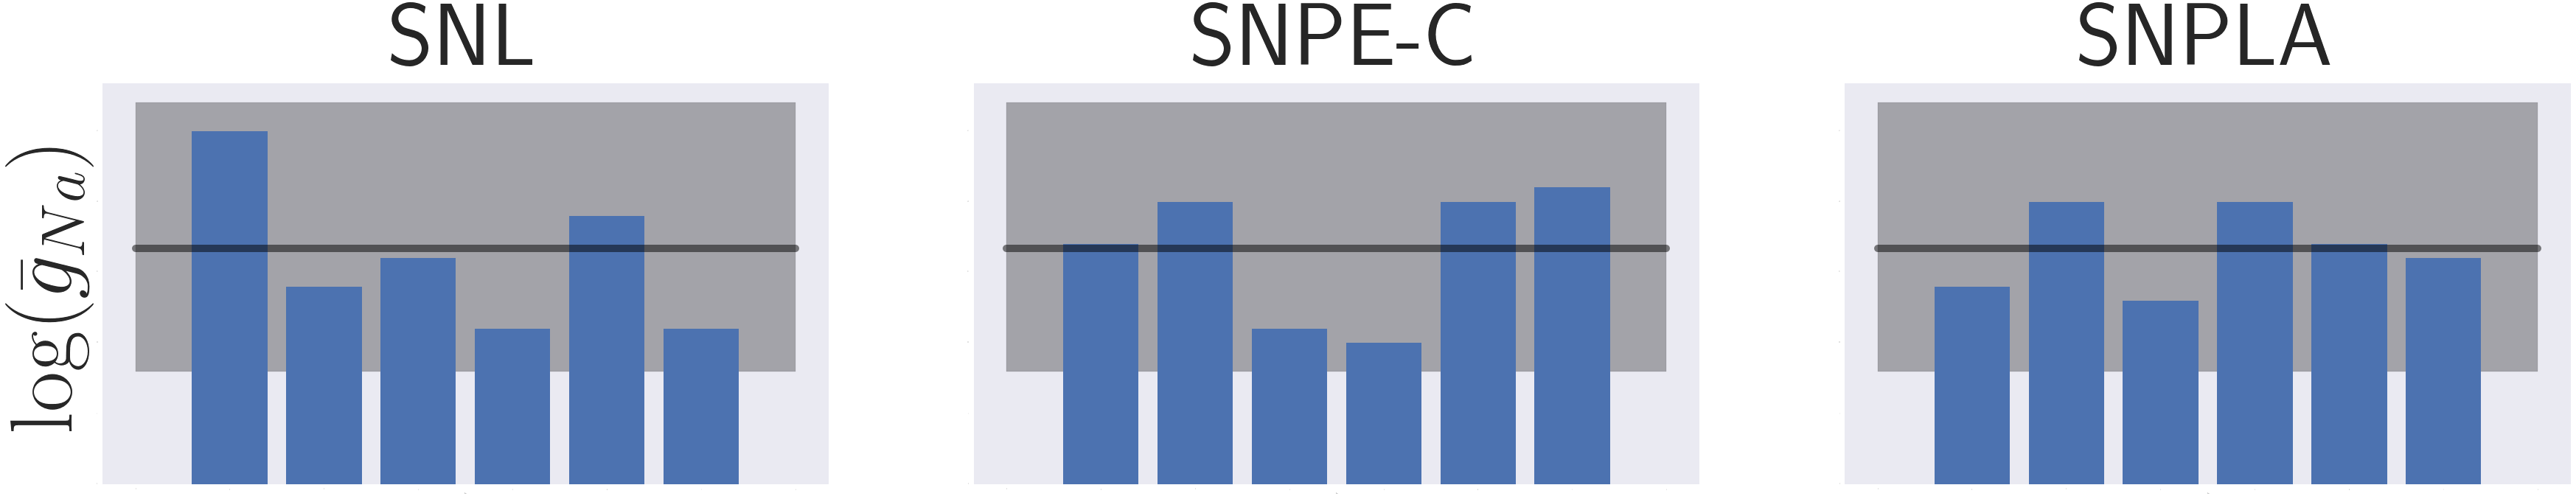

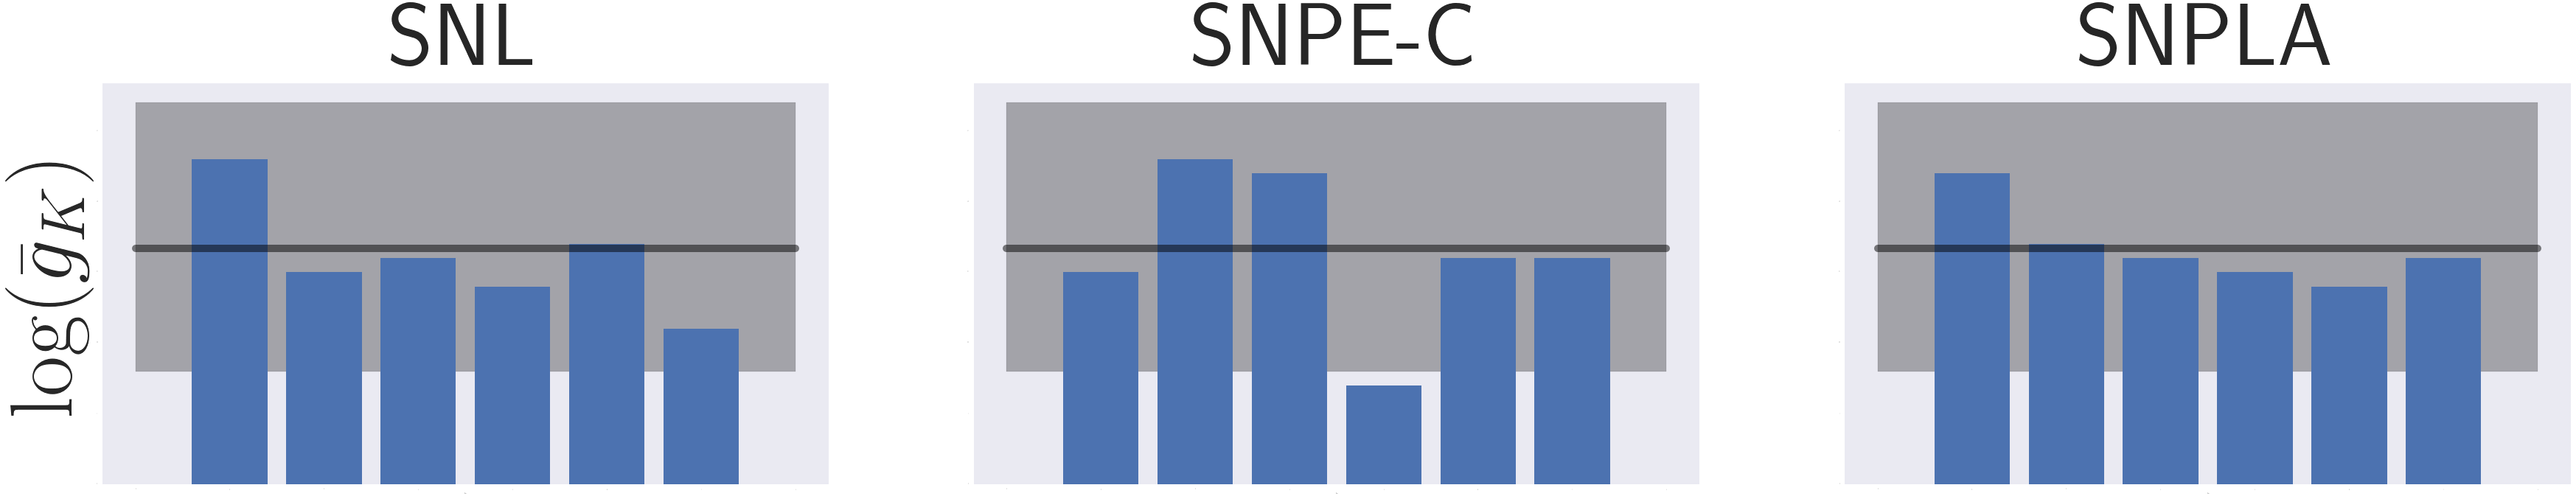

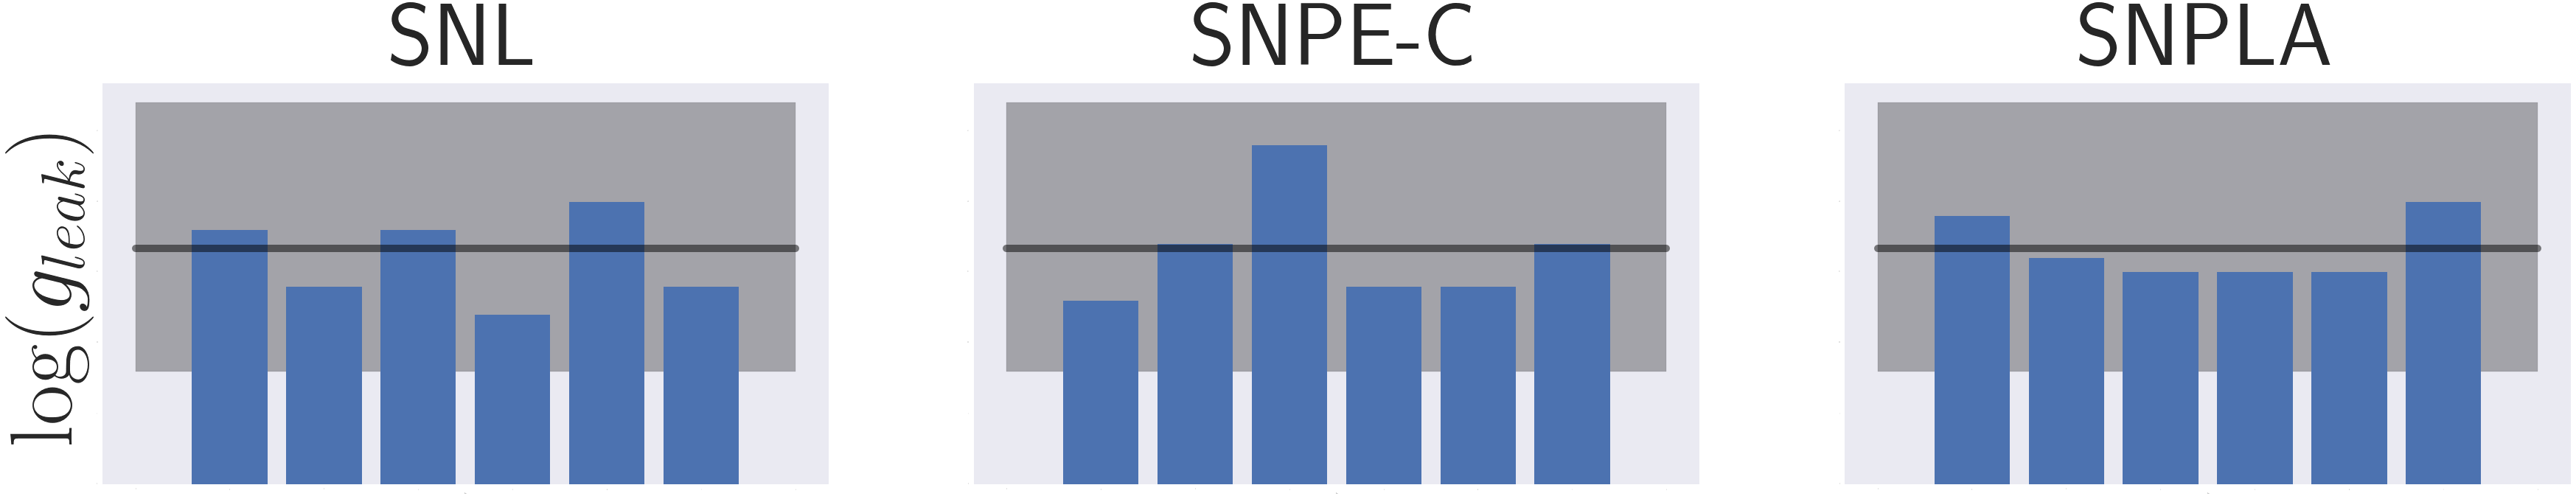

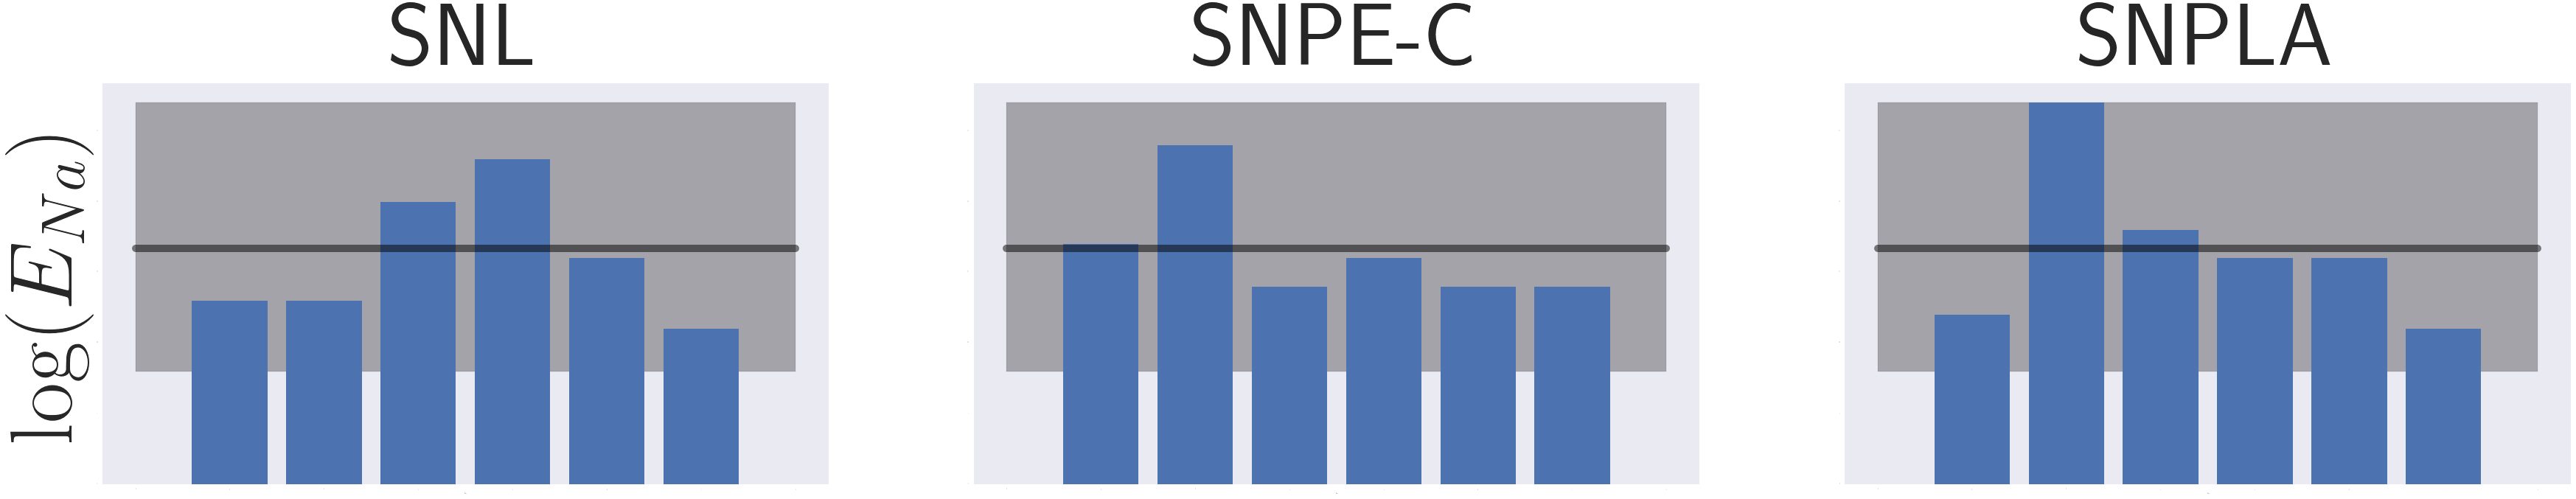

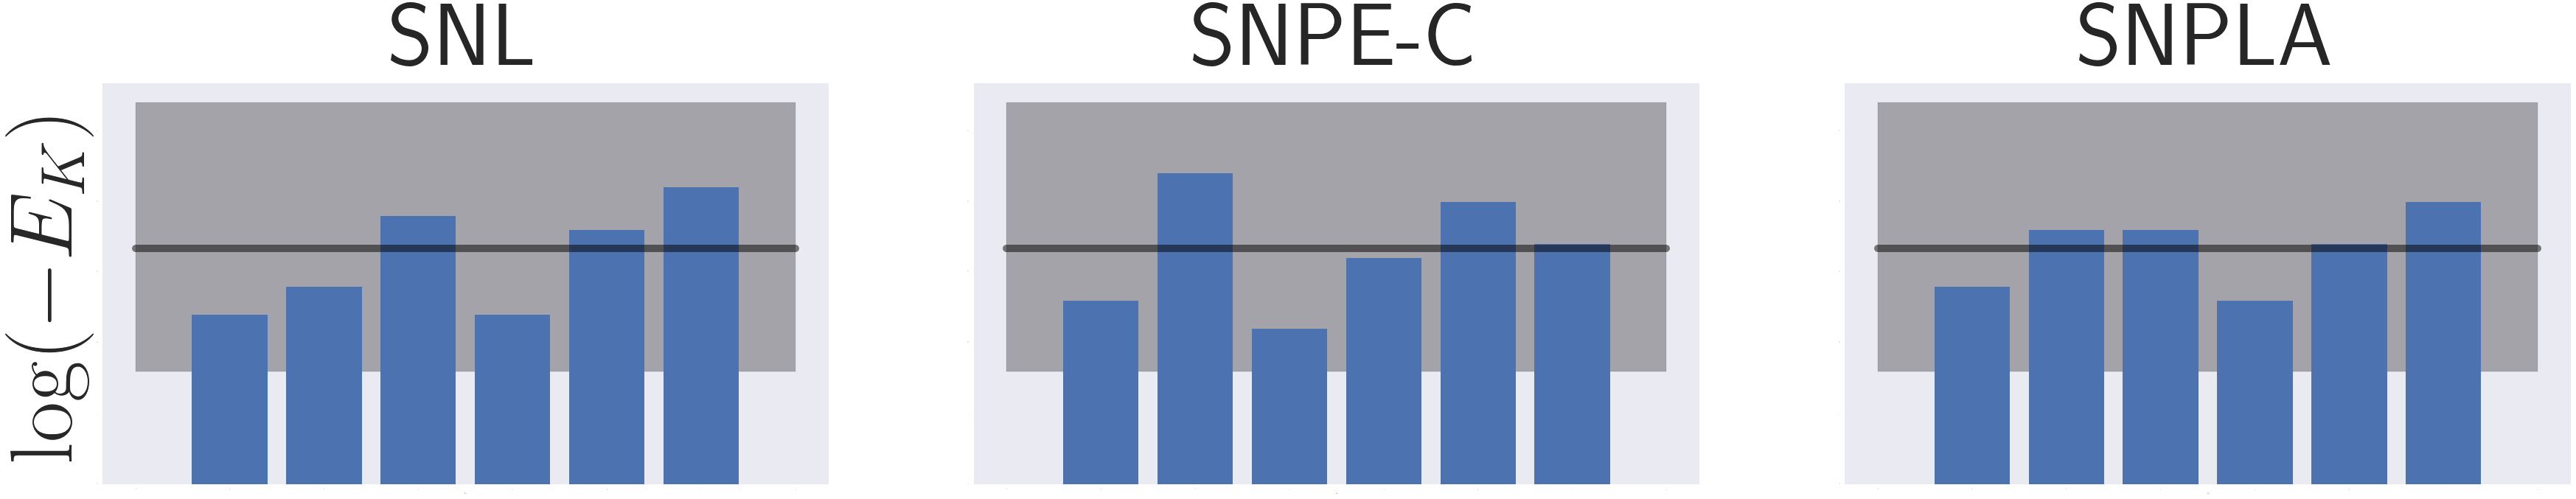

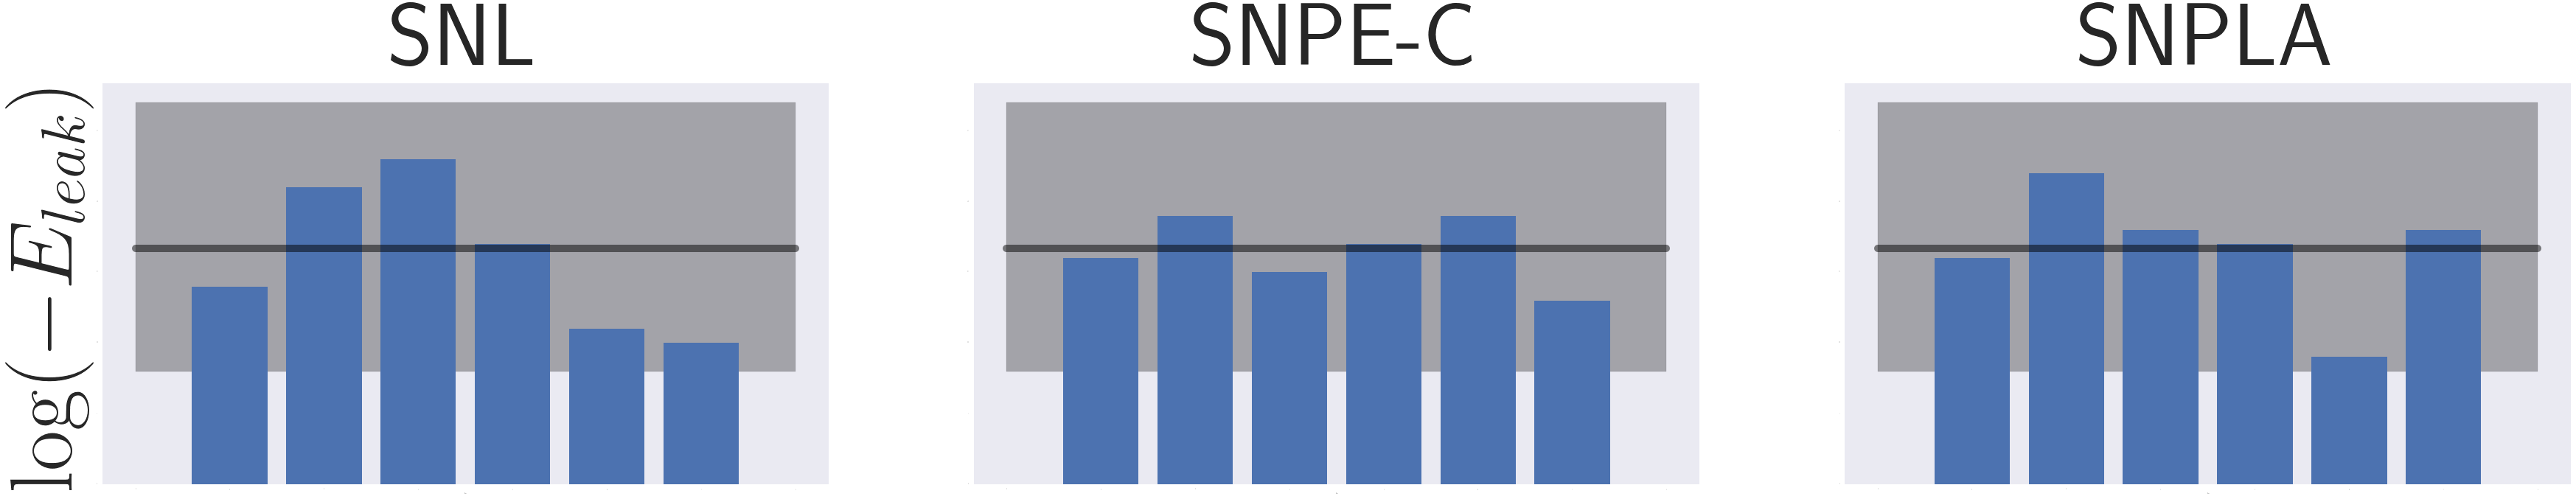

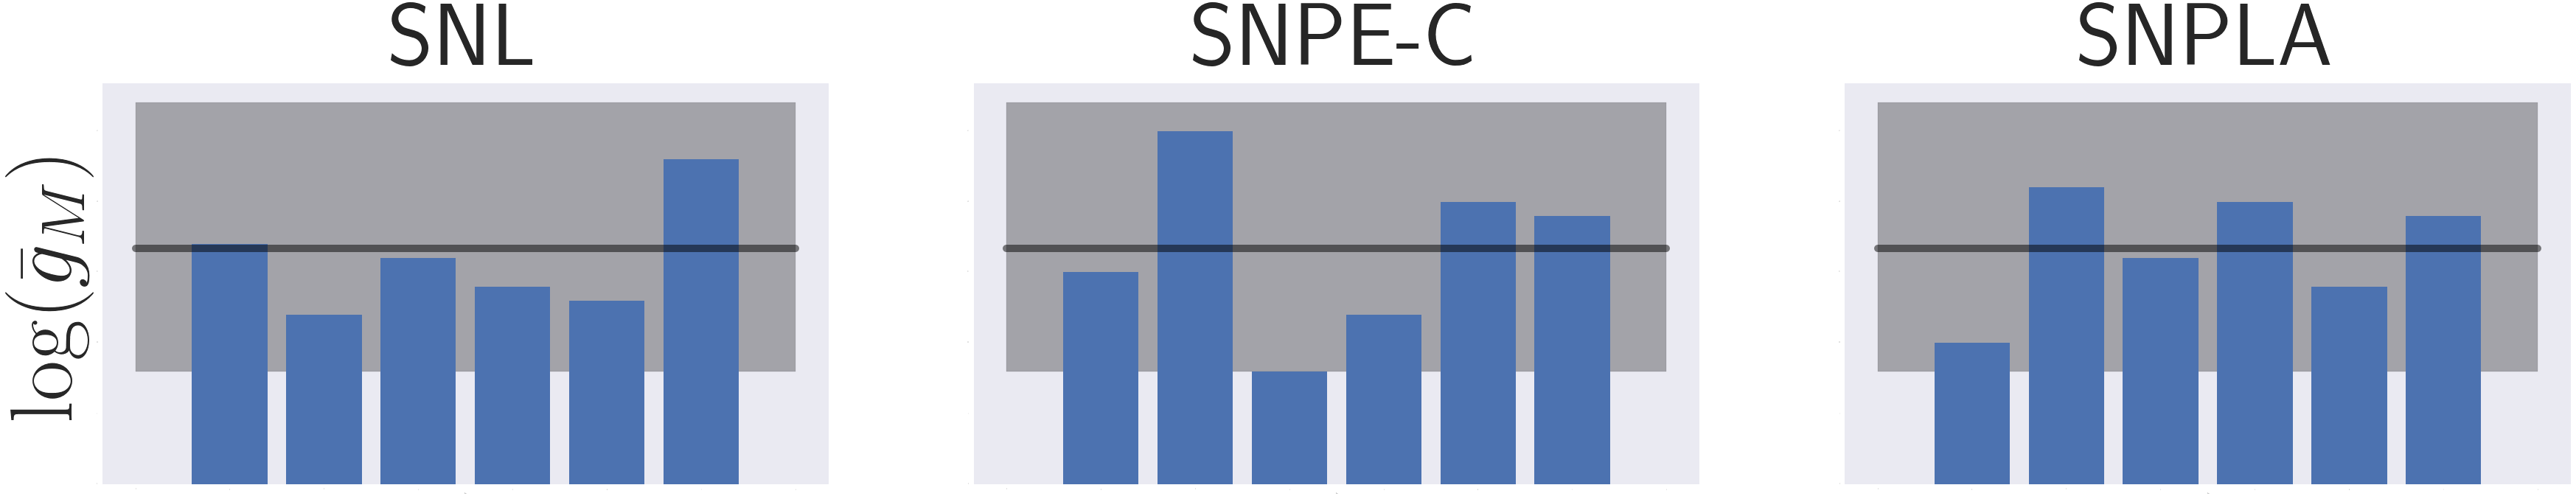

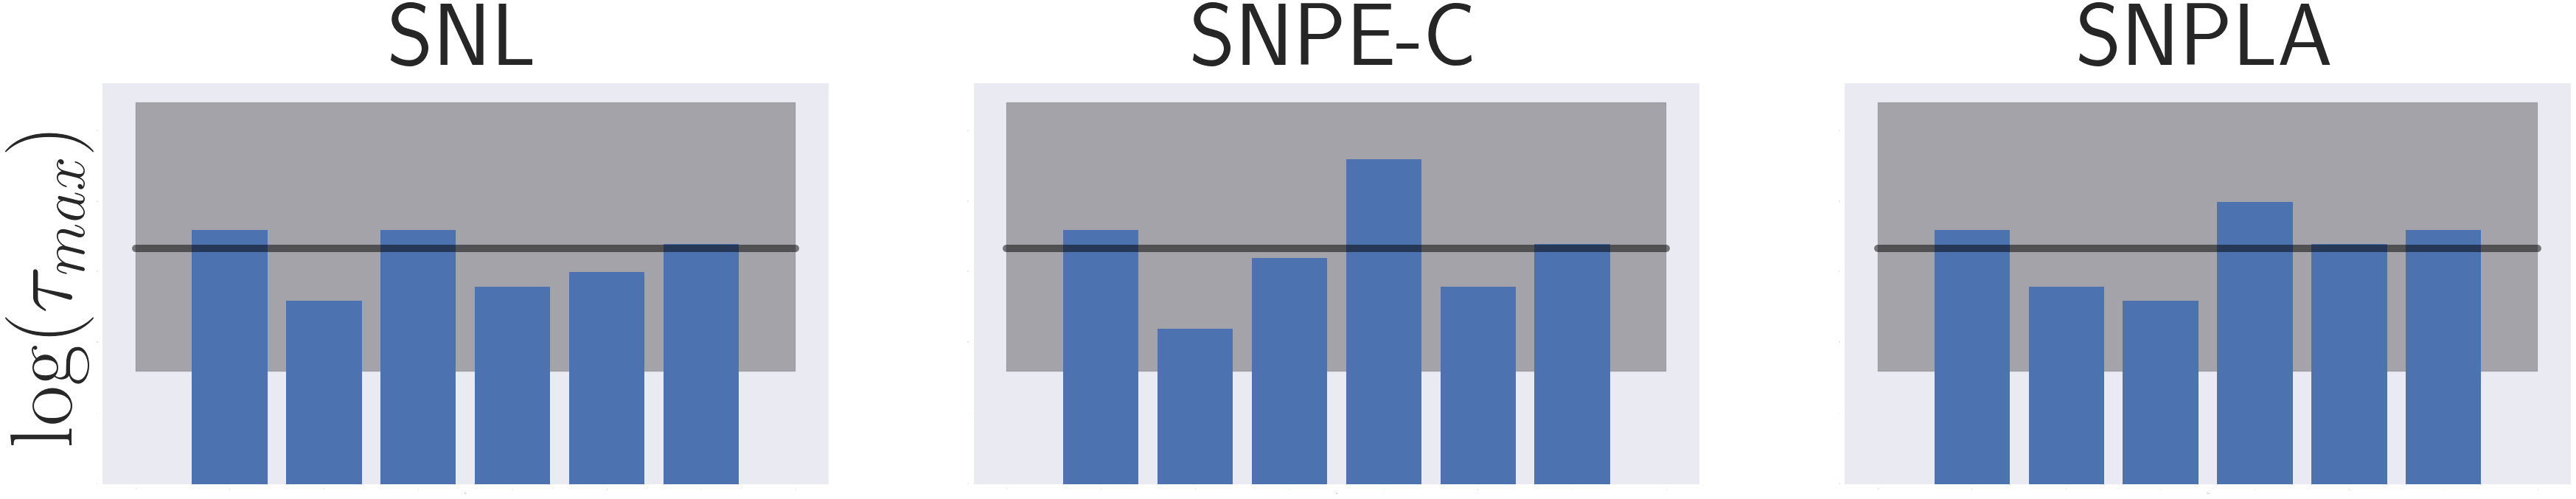

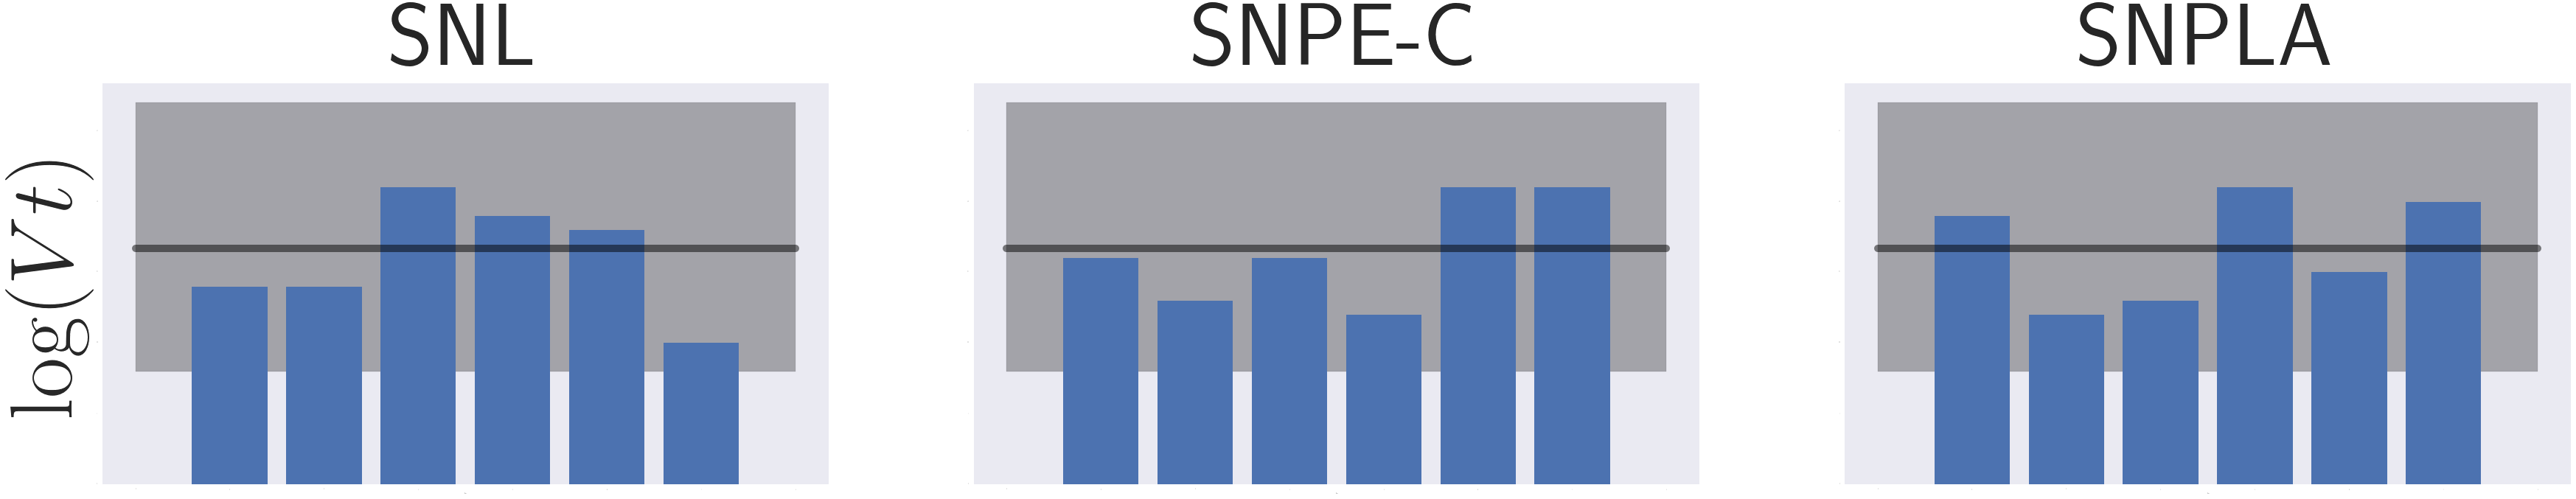

In [193]:

for param in range(9):

    theta_ranks = [snl_ranks[:,param], snpe_c_ranks[:,param], snpla_ranks[:,param]]

    fig = plt.figure(figsize = (60, 10))
    
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2, sharex=ax1) # why arent the axis fixed
    ax3 = fig.add_subplot(1, 3, 3, sharex=ax1)

    #fig.text(0.5, 0.04, labels[param], ha='center', fontsize=150)

        
    ax_list = [ax1, ax2, ax3]

    for t in range(len(theta_ranks)):

        nbr_in_bin = np.zeros((1,nbr_bins))

        for i in range(nbr_bins):
            nbr_in_bin[0,i] = sum(theta_ranks[t] == i)

        ax_list[t].bar(np.arange(nbr_bins), nbr_in_bin[0,:])
        ax_list[t].fill_between(np.arange(-1, nbr_bins+1, 1),
                                lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), 
                                alpha = 0.3, color = "k")

        ax_list[t].plot(np.arange(-1, nbr_bins+1, 1), 
                        100*1/nbr_bins*np.ones(nbr_bins+2),
                        color = "k", linewidth=10, alpha = 0.5)


    ax1.set_title("SNL",fontsize=120)
    ax2.set_title("SNPE-C",fontsize=120)
    #ax3.set_title("SNRE-B",fontsize=100)
    ax3.set_title("SNPLA",fontsize=120)

    ax1.set_ylabel(labels[param], fontsize=120)
    
    ax1.set_xlabel("Bins", fontsize=0)
    ax2.set_xlabel("Bins", fontsize=0)
    ax3.set_xlabel("Bins", fontsize=0)

    for ax in ax_list:
        ax.tick_params(axis='both', which='major', labelsize=0)
        ax.tick_params(axis='both', which='minor', labelsize=0)

    for ax in ax_list: 
        ax.tick_params(axis='x', which='major', labelsize=0)
        ax.tick_params(axis='x', which='minor', labelsize=0)
        ax.grid(False)

    plt.savefig("./fig/joint_sbc_param_"+str(param+1)+".pdf", bbox_inches='tight')
